# P/E ratio and Stock Market return

This project's goal is to show the close relationship between P/E ratios in a given year and the return in the next 10 years from that given year.
This data set consists of monthly stock price, dividends, and earnings data and the consumer price index (to allow conversion to real values), all starting January 1871.

I am using a Data set from Robert J. Shiller. http://www.econ.yale.edu/~shiller/data.htm.

Emanuele Corà

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [391]:
df = pd.read_excel("ie_data.xls", sheet_name="Data", encoding="utf-8")

In [392]:
df.columns = ["Date", "Price", "Dividends", "Earnings", "CPI", "Date Fraction", "Long Interest Rate GS10", 
              "Real price", "Real Dividend", "Real Total Return Price", "Real Earnings", "Real TR Scaled Earnings", 
             "CAPE ratio", "NAN1", "TR CAPE ratio", "NAN2"]

In [393]:
df.drop(range(7), inplace=True)

In [394]:
df.drop(columns=["NAN1", "NAN2"], inplace=True)

In [395]:
df.dropna(inplace=True)

In [396]:
df["P/E ratio"] = df["Price"] / df["Earnings"]

In [397]:
df['Date'] = df['Date'].astype(str)

In [398]:
df["len"] = df["Date"].apply(len)
df["Date"] = df["Date"].where(df["len"] == 7, df["Date"] + "0")

In [404]:
df.drop(columns="len", inplace=True)

In [405]:
print(df.shape)
df.head()

(1674, 14)


,Price,Dividends,Earnings,CPI,Date Fraction,Long Interest Rate GS10,Real price,Real Dividend,Real Total Return Price,Real Earnings,Real TR Scaled Earnings,CAPE ratio,TR CAPE ratio,P/E ratio
Date,,,,,,,,,,,,,,
1881-01-01,6.19,0.265,0.4858,9.41942,1881.04,3.7,170.697,7.30773,315.799,13.3966,24.7843,18.474,24.1351,12.7419
1881-02-01,6.17,0.27,0.4817,9.51459,1881.12,3.69333,168.444,7.37114,312.766,13.1507,24.4181,18.1473,23.6555,12.8088
1881-03-01,6.24,0.275,0.4775,9.51459,1881.21,3.68667,170.355,7.50764,317.476,13.036,24.2941,18.2701,23.7677,13.0681
1881-04-01,6.22,0.28,0.4733,9.60967,1881.29,3.68,168.129,7.56851,314.503,12.7935,23.9315,17.9501,23.3089,13.1418
1881-05-01,6.5,0.285,0.4692,9.51459,1881.37,3.67333,177.453,7.78064,333.158,12.8094,24.0489,18.8697,24.4567,13.8534


In [402]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y.%m')
df = df.set_index("Date")

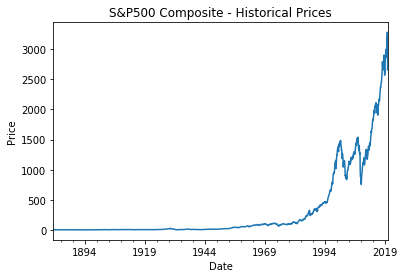

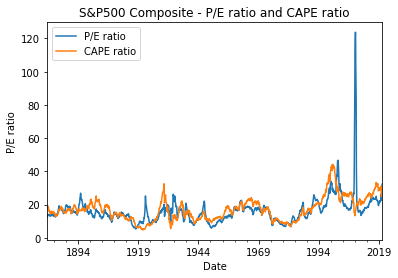

In [418]:
df["Price"].plot()
plt.title("S&P500 Composite - Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
df[["P/E ratio", "CAPE ratio"]].plot()
plt.title("S&P500 Composite - P/E ratio and CAPE ratio")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()